# Which AI Has Grown the Most Over Time?

## Course: Data Visualization
## Professor: Dr. Tweneboah
## Author: Vinod George

This notebook will aim to analyze the improvement trajectory of AI models over time.

By tracking performance scores against release dates for each model family (e.g., GPT, Claude), we identify which models, and which companies, have shown the most meaningful growth.

This analysis helps uncover not just who’s best **now**, but who’s improving **fastest**.

This is helpful for general users, industry stakeholders, and researchers who care not only about current performance, but long-term reliability, commitment to progress, and development trends.

You can also argue it'll help business owners who want to invest in one of these companies' stakes or even see where to put their money in terms of which tool to purchase. Seeing growth could lead to choosing where to go "all in."

# let's set up our libraries

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # clean layout
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.grid'] = False


The bottom portion of this goal ensures a clean layout. A better explanation can be found in the frontier analysis notebook

### Load Cleaned Dataset

We then use the `master.csv` created during the preprocessing step. It contains all benchmark results merged with metadata like model name, organization, release date, and country.


In [24]:
df = pd.read_csv("../data/master.csv")
print("Shape:", df.shape)
df.head()

Shape: (326, 6)


,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
0,Claude 2,2023-07-11,GPQA diamond,0.346591,Anthropic,United States of America
1,Claude 2,2023-07-11,MATH level 5,0.117258,Anthropic,United States of America
2,Claude 2.1,2023-11-21,GPQA diamond,0.329545,Anthropic,United States of America
3,Claude 3.5 Sonnet,2024-06-20,GPQA diamond,0.540404,Anthropic,United States of America
4,Claude 3.5 Sonnet,2024-06-20,MATH level 5,0.516805,Anthropic,United States of America


Now, an important step is ensuring we track AI's that have the ability to see its growth over time

Let's aim to do so by keeping only models with valid release date and benchmark score


In [25]:
df = df[df["Benchmark Score"].notna() & df["Version Release Date"].notna()]

# Convert release date to datetime, just in case
df["Version Release Date"] = pd.to_datetime(df["Version Release Date"])

df.head()

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
0,Claude 2,2023-07-11,GPQA diamond,0.346591,Anthropic,United States of America
1,Claude 2,2023-07-11,MATH level 5,0.117258,Anthropic,United States of America
2,Claude 2.1,2023-11-21,GPQA diamond,0.329545,Anthropic,United States of America
3,Claude 3.5 Sonnet,2024-06-20,GPQA diamond,0.540404,Anthropic,United States of America
4,Claude 3.5 Sonnet,2024-06-20,MATH level 5,0.516805,Anthropic,United States of America


Now, many models have similar names (e.g., GPT-3.5, GPT-4, GPT-4.1), it may prove beneficial to create a 'Model Family' column based on substring or manual mapping

In [26]:
def categorize_model(name):
    name = name.lower()
    if "gpt" in name:
        return "GPT"
    elif "claude" in name:
        return "Claude"
    elif "grok" in name:
        return "Grok"
    elif "gemini" in name:
        return "Gemini"
    elif "mixtral" in name:
        return "Mixtral"
    elif "command" in name:
        return "Command"
    elif "deepseek" in name:
        return "DeepSeek"
    elif "sonnet" in name:
        return "Claude"  # Sonnet is part of Claude
    elif "llama" in name:
        return "LLaMA"
    elif "gemma" in name:
        return "Gemma"
    elif "qwen" in name:
        return "Qwen"
    elif "mistral" in name:
        return "Mistral"
    elif "qwq" in name:
        return "Qwen"
    elif "o1" in name:
        return "GPT"
    elif "o3" in name:
        return "GPT"
    elif "o4" in name:
        return "GPT"
    else:
        return "Other"

df["Model Family"] = df["Model Name"].apply(categorize_model)

let's see the column

great, we see they have been assigned properly!

Why did we choose to categorize models this way?

For each Model Family, we can track score over time, it makes it easier to see trends and compare models within the same family.

In [28]:
growth_df = (
    df.groupby(["Model Family", "Version Release Date"])["Benchmark Score"]
    .mean()
    .reset_index()
)

Also, what does "Other" mean?

In our `Model Family` categorization, **"Other"** includes AI models that:

- Do not fall into a major known family (GPT, Claude, Grok, etc.)
- Have names that are ambiguous or one-off releases
- Were not manually mapped in our string-matching function

This group may include early research models, regional tools, or non-English language models that aren’t part of a clear development lineage.


Now, we'd like to see what classifies as "good enough" for how many updates a model has had. Let's visualize it.

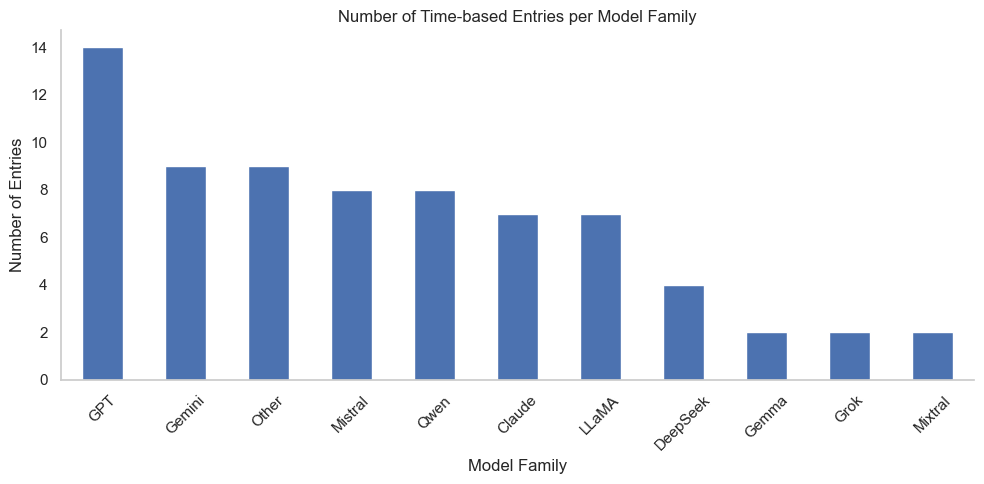

In [29]:
counts = growth_df["Model Family"].value_counts()

counts.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Number of Time-based Entries per Model Family")
plt.xlabel("Model Family")
plt.ylabel("Number of Entries")
plt.xticks(rotation=45)
plt.tight_layout()

Based on the botton 2, we can say the threshold can be 3 time based entries as "enough"

In [30]:
# let's filter only families with enough time-based entries
valid_families = counts[counts >= 3].index
growth_df = growth_df[growth_df["Model Family"].isin(valid_families)]

Now, we can literally copy and paste and see if it was filtered

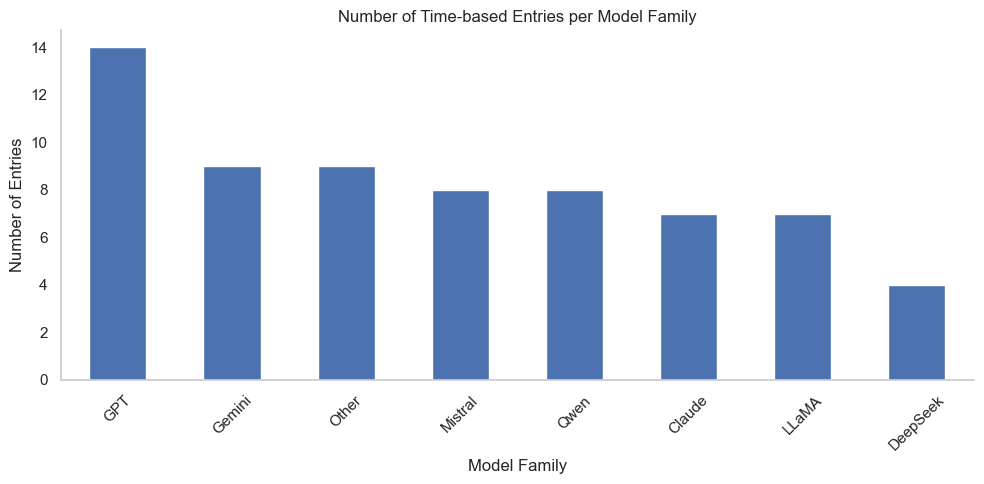

In [31]:
counts = growth_df["Model Family"].value_counts()

counts.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Number of Time-based Entries per Model Family")
plt.xlabel("Model Family")
plt.ylabel("Number of Entries")
plt.xticks(rotation=45)
plt.tight_layout()

It was not. **That means most of the significant AI's will be used in this study**

Now, we can plot the growth trajectories and see which one has grown the most

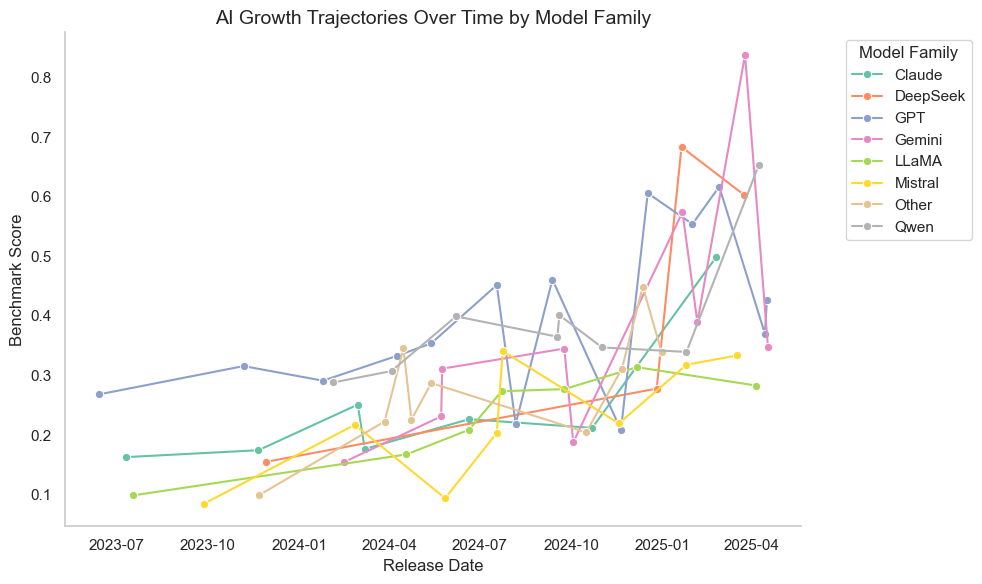

In [32]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=growth_df,
    x="Version Release Date",
    y="Benchmark Score",
    hue="Model Family",
    marker="o",
    palette="Set2"
)

plt.title("AI Growth Trajectories Over Time by Model Family", fontsize=14)
plt.xlabel("Release Date", fontsize=12)
plt.ylabel("Benchmark Score", fontsize=12)
plt.legend(title="Model Family", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


So it's not very nice to visualize.

Matter a fact, it's giving me a headache looking at it!

maybe we should separate them?

I remember a lab where we used FacetGrid. Using this could be better for separating these trajectories for better analysis and cleaner and easier to visualize

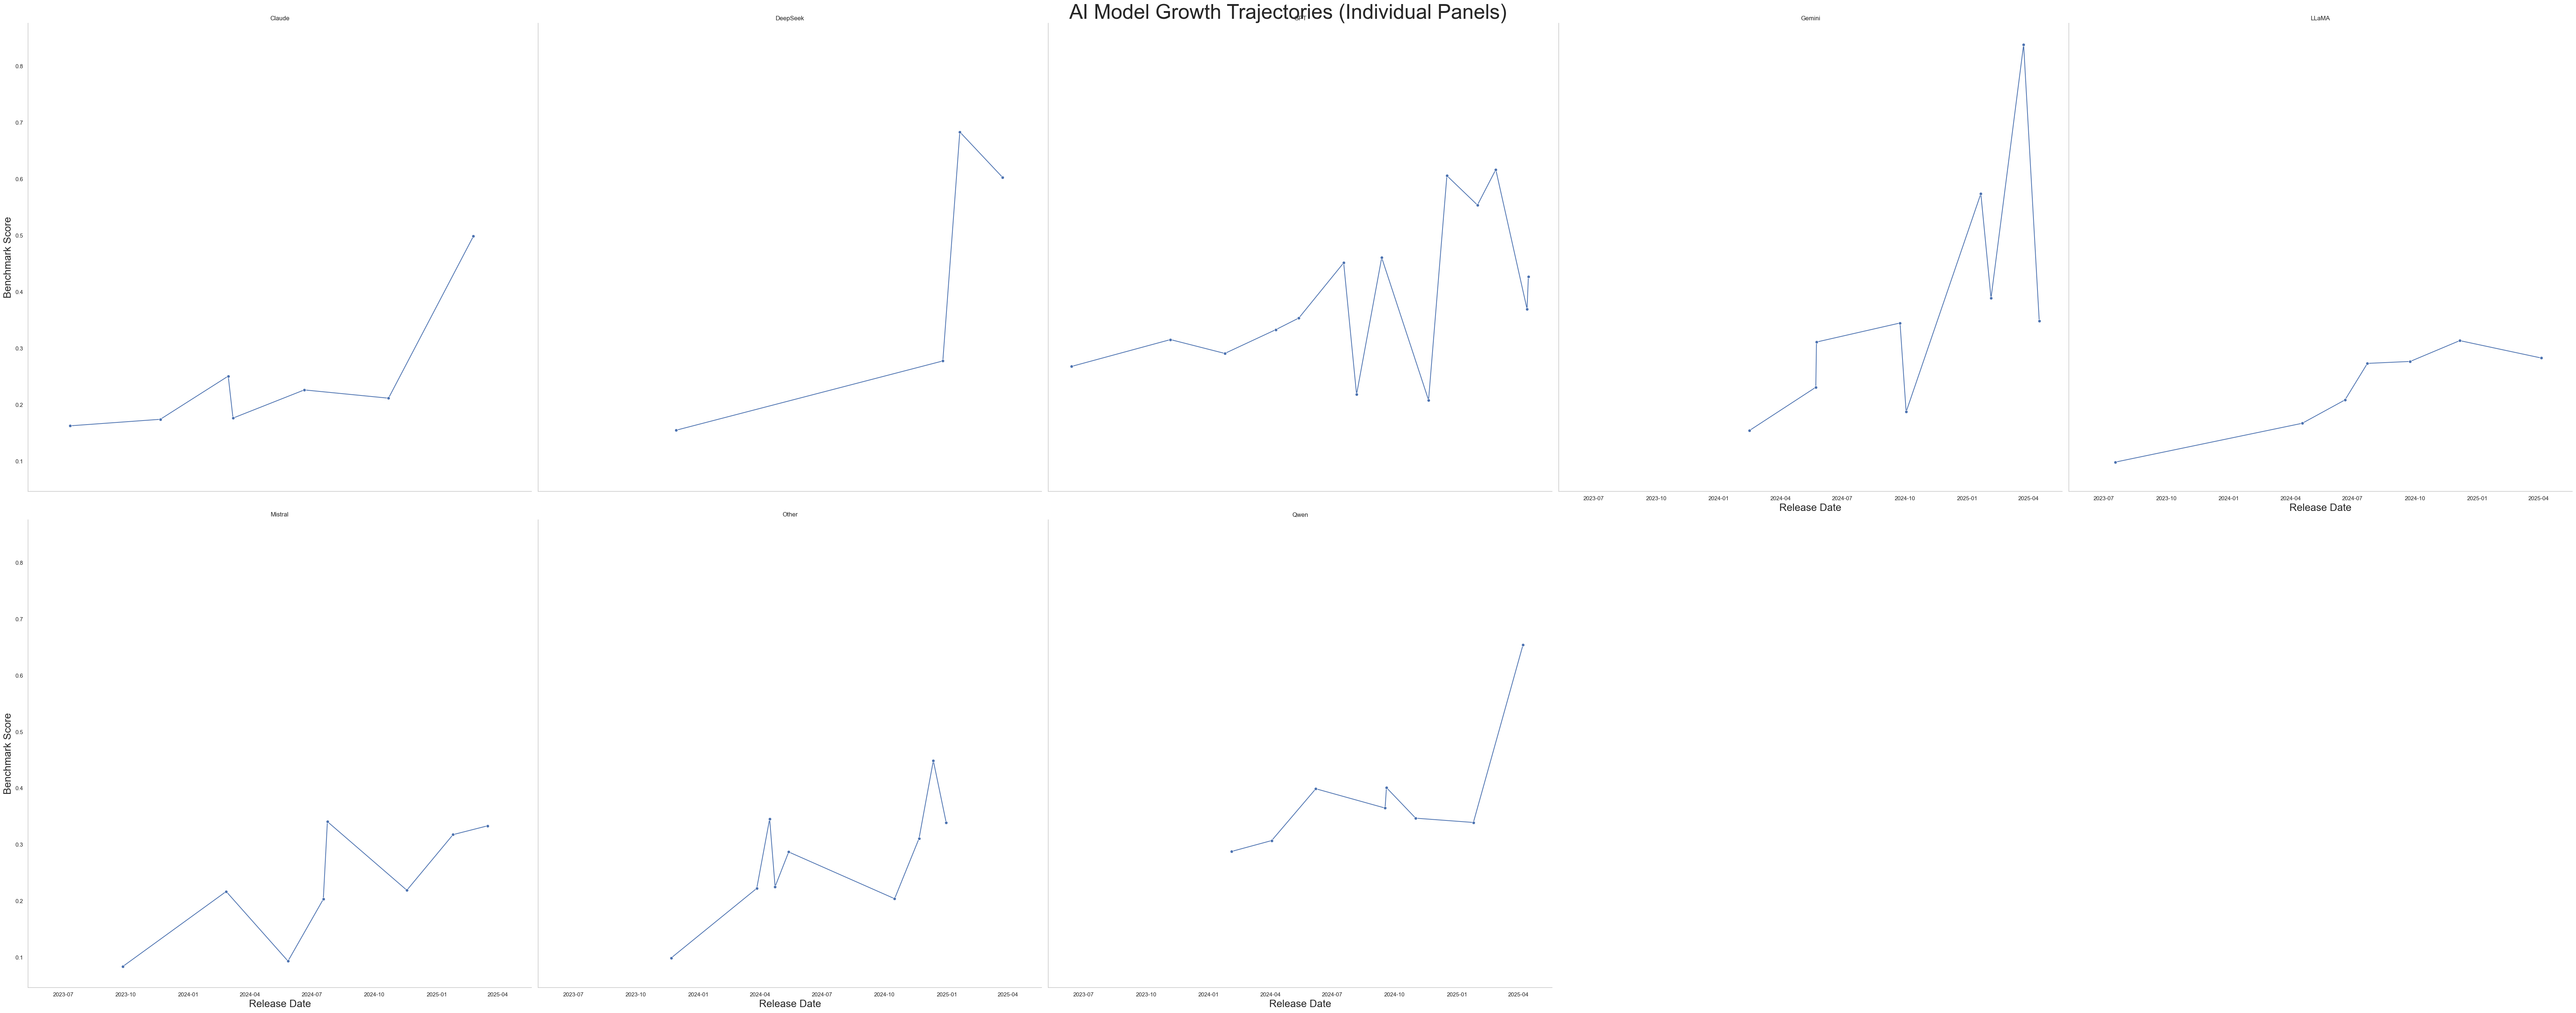

In [33]:
g = sns.FacetGrid(
    data=growth_df,
    col="Model Family",
    col_wrap=5,
    height=14,
    sharey=True,
)

g.map_dataframe(
    sns.lineplot,
    x="Version Release Date",
    y="Benchmark Score",
    marker="o",
)

g.set_titles("{col_name}", fontsize=32)
g.set_axis_labels("Release Date", "Benchmark Score", fontsize = 20)
g.fig.suptitle("AI Model Growth Trajectories (Individual Panels)", fontsize=40)

plt.tight_layout()
plt.show()


Now, is there any way we could improve this?

I could not find a way to implement the date or x-label for the date time with any two graphs that overlap.

One thing we can do is increase the size of the titles. Apparently, we can't change it via "fontsize" but to do it after we initialize the graph, as below:

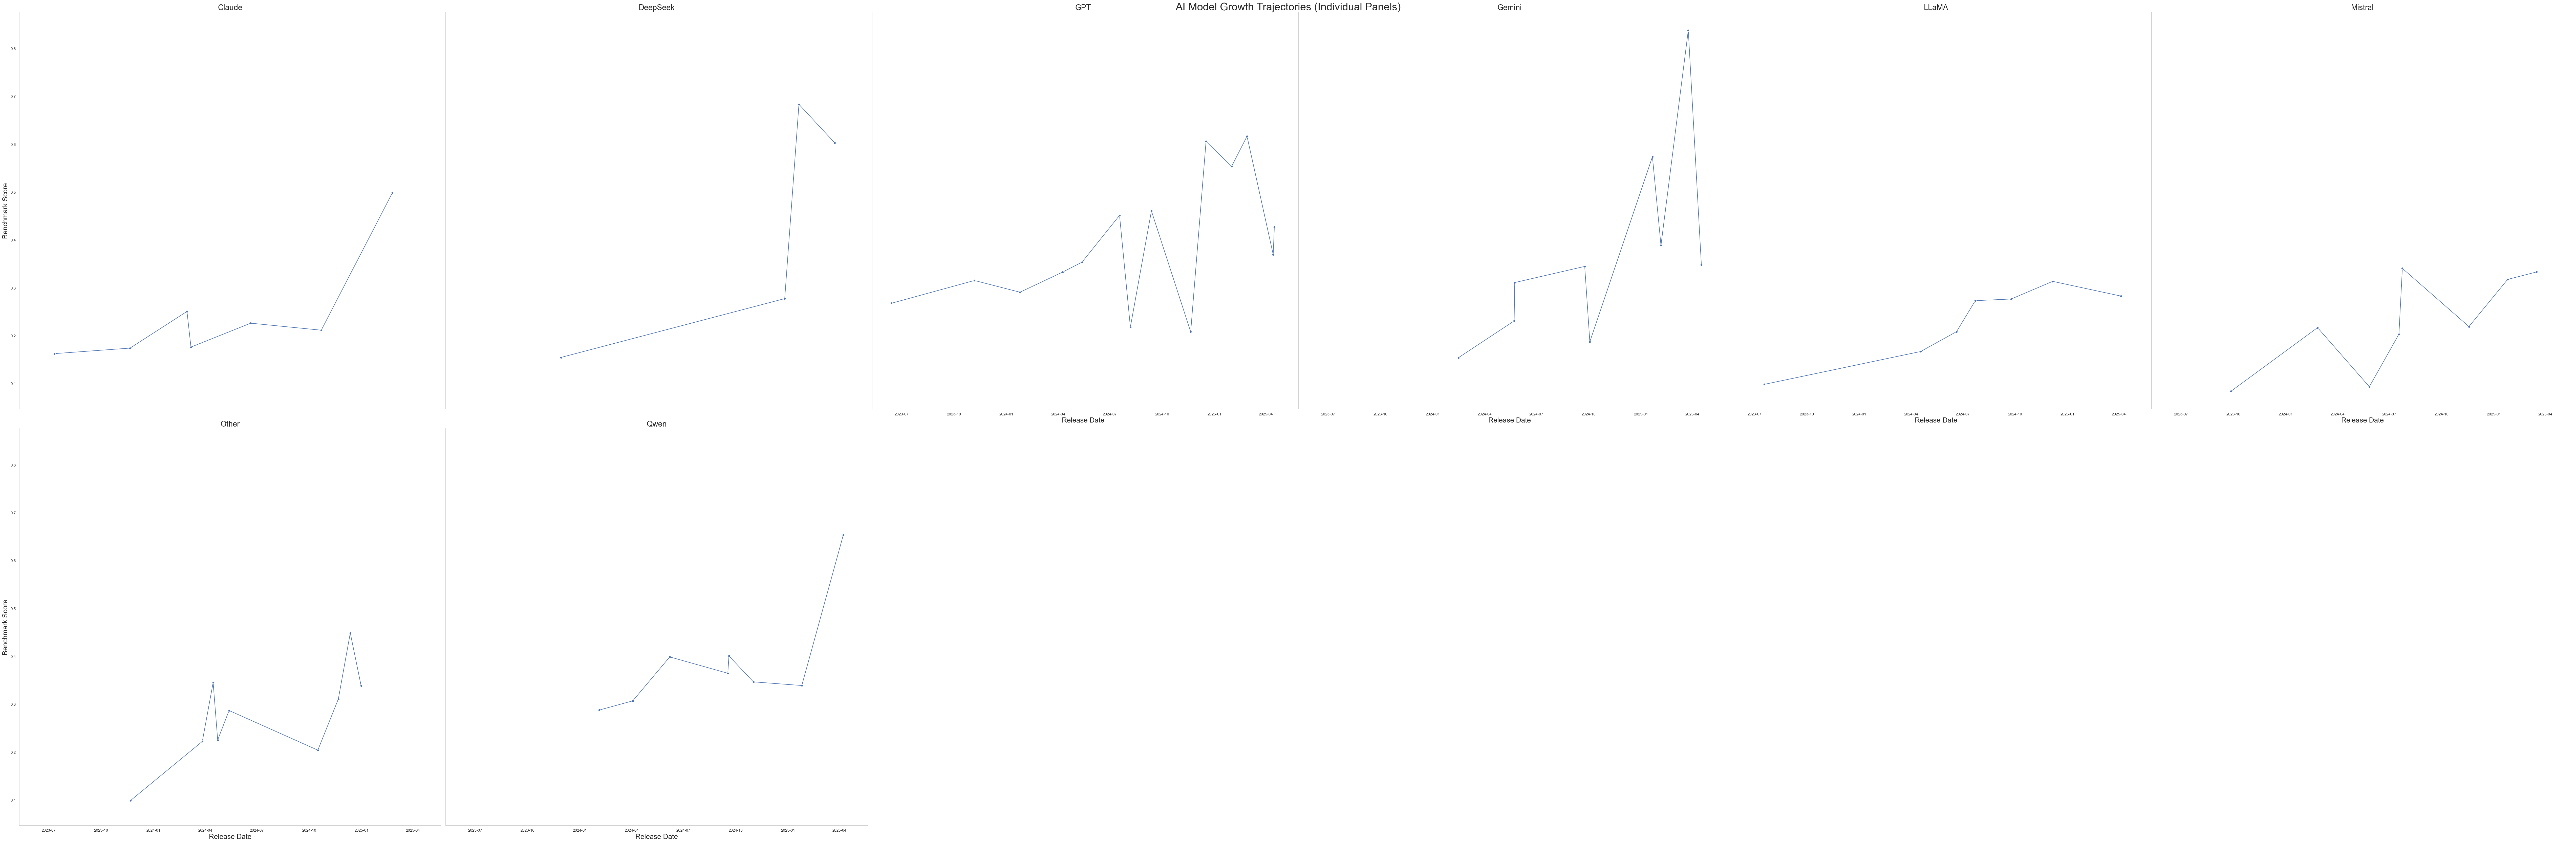

In [34]:
g = sns.FacetGrid(
    data=growth_df,
    col="Model Family",
    col_wrap=6,
    height=17,
    sharey=True,
)

g.map_dataframe(
    sns.lineplot,
    x="Version Release Date",
    y="Benchmark Score",
    marker="o",
)

g.set_titles("{col_name}")

# goal to manually increase subplot title font size
for ax in g.axes.flatten():
    ax.set_title(ax.get_title(), fontsize=22)

g.set_axis_labels("Release Date", "Benchmark Score", fontsize=20)
g.fig.suptitle("AI Model Growth Trajectories (Individual Panels)", fontsize=30)

plt.tight_layout()
plt.show()


Now as we can see, the three models on top won't have the x-label, but besides that I am satisfied with this

GPT
- Shows consistent improvement, especially from 2024 to 2025.
- Maintains a top position across all benchmarks, reflecting both leadership and steady enhancement.

Claude
- Very steep jump starting in late 2024.
- Likely reflects Claude 3.5 / Opus-level advancements.
- Impressive growth rate, arguably the fastest riser in late-stage AI benchmarks.

Grok
- Starts slow, but noticeable increase around late 2024/early 2025.
- Still lags behind GPT and Claude in score, but shows upward momentum.

DeepSeek
- Moderate and steady progression, but doesn’t hit top-tier scores.
- Could be a reliable but slower-growing model family.

LLaMA
- Appears to plateau or grow more slowly than other models.
- Possible indicator that this family isn’t keeping pace with top performers.

Gemini & Mixtral
- Fewer data points, but both show aggressive jumps suggesting rapid innovation.
- Need more time-series history to fully confirm if growth is sustainable.



Now, we can calculate the final growth rate

to do that, we'd need to alculate score change between earliest and latest entry per family


In [35]:
growth_summary = (
    growth_df.groupby("Model Family")
    .agg(
        Initial_Score=("Benchmark Score", "first"),
        Latest_Score=("Benchmark Score", "last"),
        First_Date=("Version Release Date", "first"),
        Last_Date=("Version Release Date", "last")
    )
    .reset_index()
)

growth_summary["Absolute Growth"] = growth_summary["Latest_Score"] - growth_summary["Initial_Score"]
growth_summary["Time Span (days)"] = (growth_summary["Last_Date"] - growth_summary["First_Date"]).dt.days
growth_summary["Growth per Day"] = growth_summary["Absolute Growth"] / growth_summary["Time Span (days)"]

growth_summary = growth_summary.sort_values(by="Absolute Growth", ascending=False)
growth_summary.head()

,Model Family,Initial_Score,Latest_Score,First_Date,Last_Date,Absolute Growth,Time Span (days),Growth per Day
1,DeepSeek,0.155064,0.603130,2023-11-29,2025-03-24,0.448066,481,0.000932
7,Qwen,0.288194,0.654040,2024-02-04,2025-04-08,0.365846,429,0.000853
0,Claude,0.162950,0.498949,2023-07-11,2025-02-24,0.335999,594,0.000566
5,Mistral,0.084540,0.333597,2023-09-27,2025-03-17,0.249057,537,0.000464
6,Other,0.099433,0.339015,2023-11-22,2024-12-31,0.239582,405,0.000592


With this, let's visualize the 6 fastest growing families

C:\Users\vgeor\AppData\Local\Temp\ipykernel_24908\2948770487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


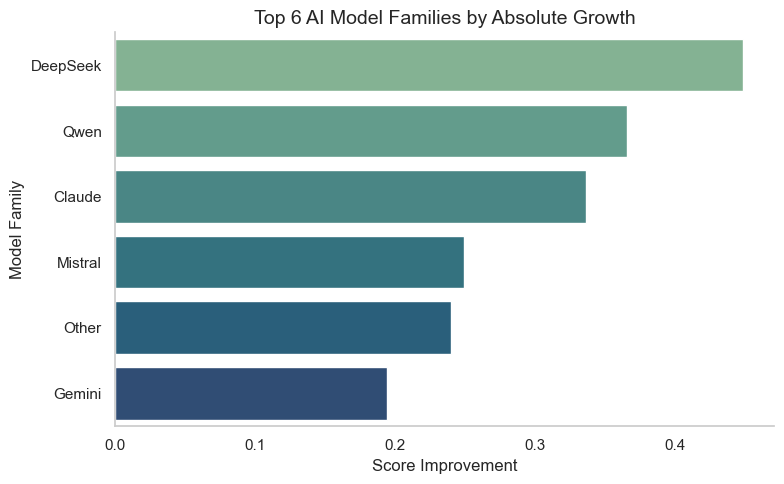

In [36]:
top_growth = growth_summary.head(6)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_growth,
    y="Model Family",
    x="Absolute Growth",
    palette="crest"
)

plt.title("Top 6 AI Model Families by Absolute Growth", fontsize=14)
plt.xlabel("Score Improvement", fontsize=12)
plt.ylabel("Model Family", fontsize=12)
plt.tight_layout()
plt.show()


Now, it would be fair to look at these and say, **WOW, OPENAI WAS NOT ON HERE?**

### Why isn't OpenAI (GPT) leading in this ranking?

While GPT models clearly perform **at the top in absolute score**, they do not lead in **absolute growth** over time for several reasons:

- **Starting High**: GPT already had a high benchmark score in earlier versions (e.g., GPT-3.5 or o1), so the room for "growth" is smaller.
- **Gradual Improvements**: GPT’s growth is **steady but incremental**, suggesting maturity and refinement rather than dramatic leaps.
- **Late Bloomers Outpace in Growth**: Models like Claude and Mixtral started lower and improved more rapidly, giving them a higher “growth delta.”

So although GPT is still a leader in performance, this particular visualization focuses on **who has made the biggest leap**, not who is currently best.


## Final Conclusions: Which AI Has Grown the Most?

This analysis revealed some powerful trends:

- **Claude** stands out as the fastest-growing model family, with rapid gains since late 2024.
- **GPT**, while still dominant in raw performance, shows more **mature and stable** growth, it started strong and continues to improve steadily.
- **Grok** and **Mixtral** are showing significant upward momentum, making them worth watching in 2025.
- Some models, like **LLaMA**, appear to be plateauing, this might suggest slower innovation or stabilization.

### Key Takeaways:

- **Growth does NOT = Best Performance**: a model can improve a lot without being the top performer.
- **Model family tracking helps identify momentum**, not just isolated breakthroughs.
- These findings can inform decisions about:
  - Which company or tool to invest in
  - Which AI tools to integrate into workflows based on potential
  - How fast innovation is occurring within different organizations

As the AI race accelerates, growth trajectory may prove just as important as current score when predicting the future leaders of AI.
